Code to generate an artifical dataset in order to test our solution

#10 nodes
Sin function with 1 day period, 1 sample every min

#1 Reference Stations: 
Sin function with 1 day period, 1 sample every hour

01/05/2021 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import random
import win32api


GENERATE A SYNTHETIC DATASET BASED ON REAL DATA.

DATA FOR THE REFERENCE STATION

In [2]:
#The real perios is 01/03/2020 till 03/03/2020, and the reference station is the codigoSerial=90
start_time ="2021-10-05 00:00:00"
end_time   ="2021-10-08 00:00:00"

header_SS=["Fecha_Hora","codigoSerial","pm25","calidad_pm25","pm10","calidad_pm10"]
datatypes_SS={"codigoSerial":np.uint16,"pm25":np.float32,"pm10":np.float32}
df_SS = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/2 from real/"+"SS_Synthetic_2.csv", header=None,names=header_SS, usecols=header_SS , dtype=datatypes_SS,parse_dates=["Fecha_Hora"], 
            dayfirst=True)


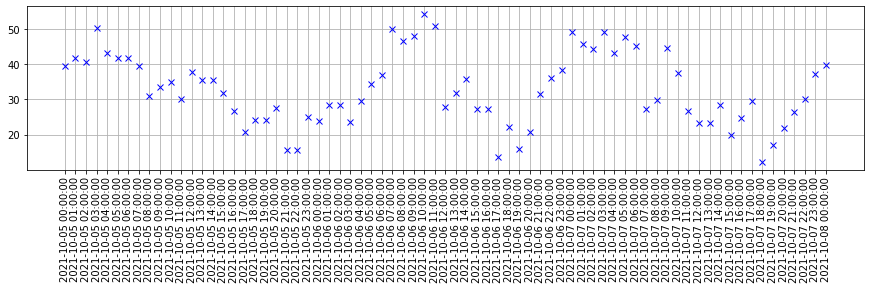

In [3]:
df_SS["Time"] = [d.strftime('%Y-%m-%d %H:%M:%S') for d in df_SS['Fecha_Hora']]
plt.figure(figsize=(15,3))
#plt.plot(df_SS["pm25"],"bx")
plt.plot(df_SS["Time"],df_SS["pm25"],"bx")
plt.xticks(rotation=90)
plt.grid()
#print(df_SS.head(5))


DATA FOR THE CITIZEN NODE

Empty DataFrame
Columns: [codigoSerial, fecha, hora, fechaHora, temperatura, humedad_relativa, pm1_df, pm10_df, pm25_df, pm1_nova, pm10_nova, pm25_nova, calidad_temperatura, calidad_humedad_relativa, calidad_pm1_df, calidad_pm10_df, calidad_pm25_df, calidad_pm1_nova, calidad_pm10_nova, calidad_pm25_nova]
Index: []
2021-10-05 00:00:00 2021-10-08 00:00:00 73
2021-10-05 00:00:00 2021-10-08 00:00:00 4321


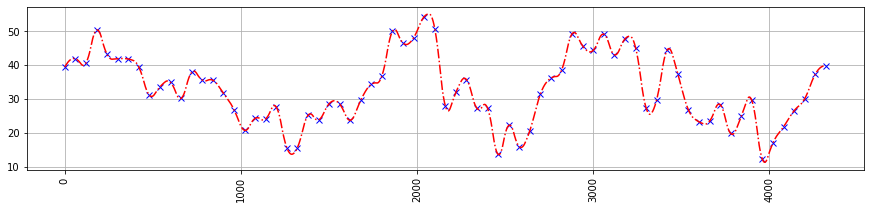

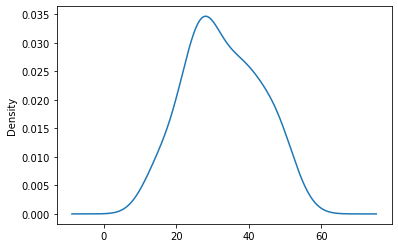

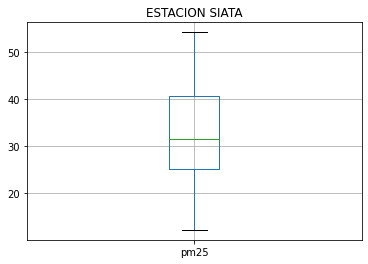

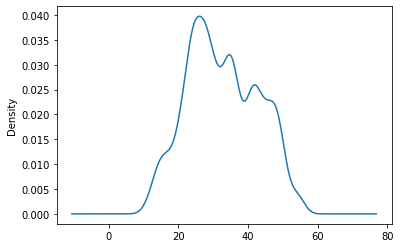

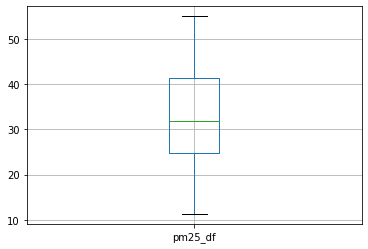

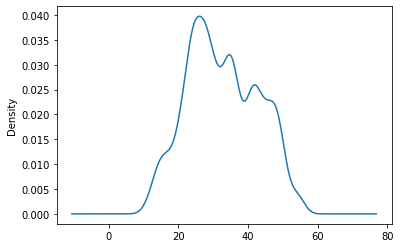

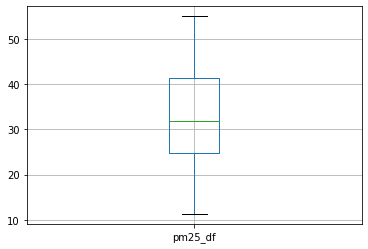

Cantidad de nan:  0
  codigoSerial fecha hora           fechaHora temperatura humedad_relativa  \
0          NaN   NaN  NaN 2021-10-05 00:00:00         NaN              NaN   
1          NaN   NaN  NaN 2021-10-05 00:01:00         NaN              NaN   
2          NaN   NaN  NaN 2021-10-05 00:02:00         NaN              NaN   
3          NaN   NaN  NaN 2021-10-05 00:03:00         NaN              NaN   
4          NaN   NaN  NaN 2021-10-05 00:04:00         NaN              NaN   

  pm1_df pm10_df    pm25_df pm1_nova  ... pm25_nova calidad_temperatura  \
0    NaN     NaN  39.364700      NaN  ...       NaN                 NaN   
1    NaN     NaN  39.463196      NaN  ...       NaN                 NaN   
2    NaN     NaN  39.559736      NaN  ...       NaN                 NaN   
3    NaN     NaN  39.654319      NaN  ...       NaN                 NaN   
4    NaN     NaN  39.746945      NaN  ...       NaN                 NaN   

  calidad_humedad_relativa calidad_pm1_df calidad_pm10_df ca

In [14]:
header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
df_CC=pd.DataFrame(columns=header_CC)
print(df_CC)

#build a reference datetime column within the same period of the robust station
df_CC["fechaHora"] = pd.date_range(df_SS.Time.min(),(pd.to_datetime(df_SS.Time.max())+timedelta(minutes=0)).ceil('60min'), freq='1Min')
print(df_SS.Time.min(),df_SS.Time.max(),len(df_SS))
print(df_CC.fechaHora.min(),df_CC.fechaHora.max(),len(df_CC))

#Fill with same data from the robust station at every hour, other values will remail in nan
for d in df_SS['Time']:
    df_CC.loc[df_CC.fechaHora==d,"pm25"]=df_SS.loc[df_SS.Fecha_Hora==d,"pm25"].values[0]
    #print(df_CC.loc[df_CC.fechaHora==d,"Time"], df_CC.loc[df_CC.fechaHora==d,"pm25_df"])

df_CC.sort_values(by="fechaHora", axis=0, ascending=True, inplace=False, ignore_index=True)

# interpoate the missing values using the spiline method in order 3.
df_CC["pm25_df"]=df_CC.pm25.interpolate(method='polynomial', axis=0, order=2)


#Both not interpolated and interpolated data plot
plt.figure(figsize=(15,3))
#df_CC["Time"] = [d.strftime('%Y-%m-%d %H:%M:%S') for d in df_CC['fechaHora']]
#plt.plot(df_CC["Time"],df_CC["pm25_df"],"bx")
plt.plot(df_CC["pm25"],"bx")
plt.plot(df_CC["pm25_df"],"r-.")
plt.xticks(rotation=90)
plt.grid()

#Density and boxplot before cleaning
plt.figure()
df_CC["pm25"].plot.density()
plt.show()
df_CC.boxplot(["pm25"])
plt.title("ESTACION SIATA")
df_CC=df_CC.copy()

#Density and boxplot before cleaning
plt.figure()
df_CC["pm25_df"].plot.density()
plt.show()
df_CC.boxplot(["pm25_df"])
df_CC=df_CC.copy()

#CLEANING
Q1 = df_CC['pm25_df'].quantile(0.25)
Q3 = df_CC['pm25_df'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
df_CC.loc[df_CC["pm25_df"]>=Q3 + 1.5 *IQR,"pm25_df"]=np.nan

plt.figure()
df_CC["pm25_df"].plot.density()
plt.show()
df_CC.boxplot(["pm25_df"])
plt.show()

print("Cantidad de nan: ",np.count_nonzero(np.isnan(df_CC['pm25_df'])))
print(df_CC.head(5))


Get a Sample from a real citizen node to build a model for the temperature and humidity variables based on the PM2.5 concentrations

Text(0.5, 1.0, 'Temperature vs relative humidity')

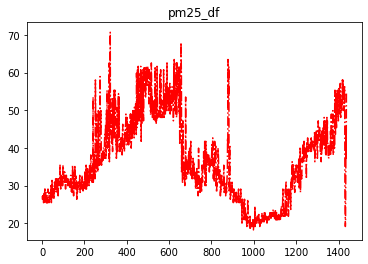

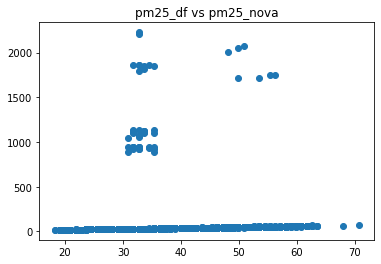

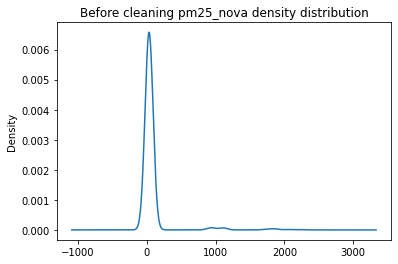

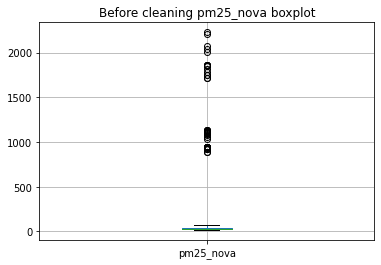

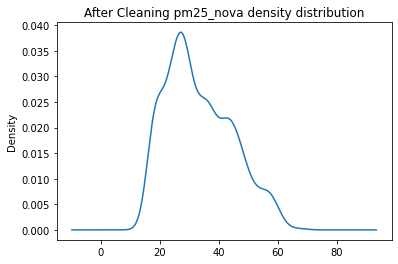

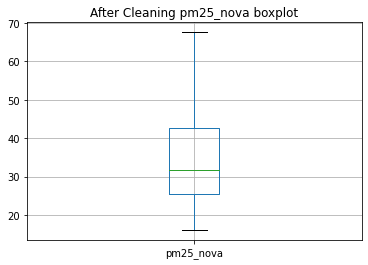

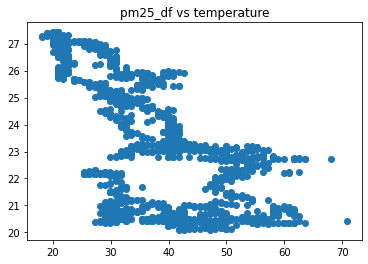

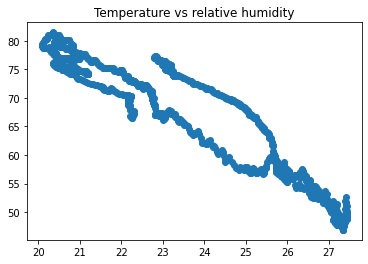

In [15]:
header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
datatypes_CC={"codigoSerial":np.uint16, "temperatura":np.float16, "humedad_relativa":np.float16, "pm1_df":np.float32, "pm10_df":np.float32, "pm25_df":np.float32, "pm1_nova":np.float32, "pm10_nova":np.float32, "pm25_nova":np.float32}
CC_data = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Real/"+"CC_PM_March.csv", header=None, names=header_CC, usecols=header_CC , dtype=datatypes_CC,parse_dates=["fecha","hora","fechaHora"])

#get a one day sample from the node with codigoSerial=67.
df_CC_CUT=CC_data.loc[(CC_data.codigoSerial==67) & (CC_data.fechaHora<="2020-03-03 00:00:00") & (CC_data.fechaHora>="2020-03-02 00:00:00"),][["codigoSerial","fechaHora","pm25_df","pm25_nova","temperatura","humedad_relativa"]]

df_CC_CUT=df_CC_CUT.reset_index()
df_CC_CUT.pop("index")

#Cut to see the behavior of the pm2.5 in this node at the chosen period
plt.figure()
plt.plot(df_CC_CUT.pm25_df,"r-.")
plt.title("pm25_df")

plt.figure()
plt.scatter(df_CC_CUT.pm25_df,df_CC_CUT.pm25_nova)
plt.title("pm25_df vs pm25_nova")

#Density and boxplot before cleaning
plt.figure()
df_CC_CUT["pm25_nova"].plot.density()
plt.title("Before cleaning pm25_nova density distribution")
plt.figure()
df_CC_CUT.boxplot(["pm25_nova"])
plt.title("Before cleaning pm25_nova boxplot")

df_CC_CUT=df_CC_CUT.copy()

#CLEANING
Q1 = df_CC_CUT['pm25_nova'].quantile(0.25)
Q3 = df_CC_CUT['pm25_nova'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 
df_CC_CUT.loc[df_CC_CUT["pm25_nova"]>=Q3 + 1.5 *IQR,"pm25_nova"]=np.nan

plt.figure()
df_CC_CUT["pm25_nova"].plot.density()
plt.title("After Cleaning pm25_nova density distribution")
plt.figure()
df_CC_CUT.boxplot(["pm25_nova"])
plt.title("After Cleaning pm25_nova boxplot")

plt.figure()
plt.scatter(df_CC_CUT.pm25_df,df_CC_CUT.temperatura)
plt.title("pm25_df vs temperature")
plt.figure()
plt.scatter(df_CC_CUT.temperatura,df_CC_CUT.humedad_relativa)
plt.title("Temperature vs relative humidity")

POLYNOMIAL REGRESSION

Coefficients for Temperature:  [[ 0.0000000e+00 -1.3372504e+00  2.6521955e-02 -1.7845631e-04]]
Intercept:  [44.785454]
Coefficients for Humidity:  [[ 0.0000000e+00  4.4629354e+00 -7.4900344e-02  4.1961670e-04]]
Intercept:  [-12.343803]


Text(0.5, 1.0, 'Temperature vs Relative Humidity (from model)')

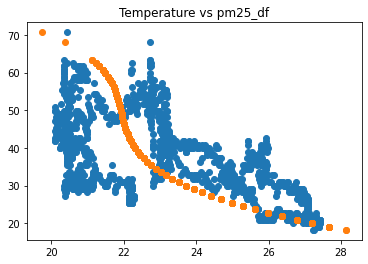

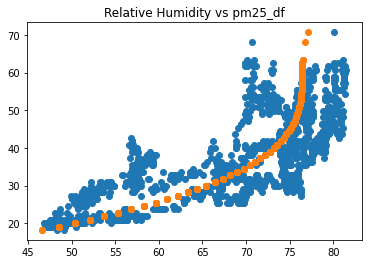

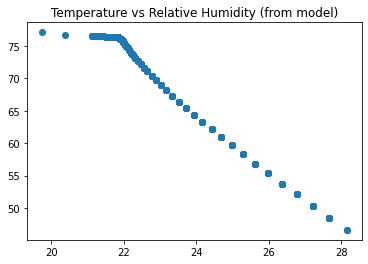

In [16]:
#Variables for the polynomial regression: get temperature in terms of the pm2.5
X = pd.DataFrame(df_CC_CUT["pm25_df"])
y = pd.DataFrame(df_CC_CUT["temperatura"])
#X = df_CC_CUT["pm25_df"]
#y = df_CC_CUT["temperatura"]
order=3
poly = PolynomialFeatures(degree = order)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
model=lin2.fit(X_poly, y)
print("Coefficients for Temperature: ", model.coef_)
print("Intercept: ", model.intercept_)

#df_CC_CUT["temperatura3"]=lin2.predict(poly.fit_transform(X))
td=model.coef_[0][0] #0.0000000e+00
tc=model.coef_[0][1] #-1.3372504e+00
tb=model.coef_[0][2] #2.6521955e-02
ta=model.coef_[0][3] #-1.7845631e-04
taa=0*model.coef_[0][0] #-1.7845631e-04
te=model.intercept_[0] #44.785454

df_CC_CUT["temperatura2"]=taa*df_CC_CUT["pm25_df"]**4+ta*df_CC_CUT["pm25_df"]**3+tb*df_CC_CUT["pm25_df"]**2+tc*df_CC_CUT["pm25_df"]+td+te

plt.figure()
plt.scatter(df_CC_CUT.temperatura,df_CC_CUT.pm25_df)
plt.scatter(df_CC_CUT.temperatura2,df_CC_CUT.pm25_df)
#plt.scatter(df_CC_CUT.temperatura3,df_CC_CUT.pm25_df)
#plt.scatter(df_CC_CUT.temperatura4,df_CC_CUT.pm25_df)
plt.title("Temperature vs pm25_df")

from sklearn.metrics import r2_score
y_true = pd.DataFrame(df_CC_CUT["temperatura"])
y_pred = pd.DataFrame(df_CC_CUT["temperatura2"])



#Variables for the polynomial regression: get relative humidity in terms of the pm2.5
X = pd.DataFrame(df_CC_CUT["pm25_df"])
y = pd.DataFrame(df_CC_CUT["humedad_relativa"])
#X=df_CC_CUT["pm25_df"]
#y=df_CC_CUT["humedad_relativa"]

poly = PolynomialFeatures(degree = order)
X_poly = poly.fit_transform(X)
 
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
model=lin2.fit(X_poly, y)
print("Coefficients for Humidity: ", model.coef_)
print("Intercept: ", model.intercept_)
#df_CC_CUT["humedad_relativa3"]=lin2.predict(poly.fit_transform(X))

hd=model.coef_[0][0] #0.0000000e+00
hc=model.coef_[0][1] #4.4629354e+00
hb=model.coef_[0][2] #-7.4900344e-02
ha=model.coef_[0][3] #4.1961670e-04
haa=0*model.coef_[0][0] #4.1961670e-04
he=model.intercept_[0] #-12.343803

df_CC_CUT["humedad_relativa2"]=haa*df_CC_CUT["pm25_df"]**4+ha*df_CC_CUT["pm25_df"]**3+hb*df_CC_CUT["pm25_df"]**2+hc*df_CC_CUT["pm25_df"]+hd+he

plt.figure()
plt.scatter(df_CC_CUT.humedad_relativa,df_CC_CUT.pm25_df)
plt.scatter(df_CC_CUT.humedad_relativa2,df_CC_CUT.pm25_df)
#plt.scatter(df_CC_CUT.humedad_relativa3,df_CC_CUT.pm25_df)
#plt.scatter(df_CC_CUT.humedad_relativa4,df_CC_CUT.pm25_df)
plt.title("Relative Humidity vs pm25_df")

plt.figure()
plt.scatter(df_CC_CUT.temperatura2,df_CC_CUT.humedad_relativa2)
plt.title("Temperature vs Relative Humidity (from model)")

In [17]:
#Get the r_square for both models
from sklearn.metrics import r2_score
y_true = pd.DataFrame(df_CC_CUT["temperatura"])
y_pred = pd.DataFrame(df_CC_CUT["temperatura2"])
print("r-squared temperature: ",r2_score(y_true, y_pred))

from sklearn.metrics import r2_score
y_true = pd.DataFrame(df_CC_CUT["humedad_relativa"])
y_pred = pd.DataFrame(df_CC_CUT["humedad_relativa2"])
print("r-squared humidity: ",r2_score(y_true, y_pred))

r-squared temperature:  0.4547618987435844
r-squared humidity:  0.6165109156575799


BASED ON THE POLYNOMIAL MODEL (Order 3, NOW WE GET OUR FINAL 3-days DATASET AS FOLLOWS

      codigoSerial fecha hora           fechaHora  temperatura  \
4316            67   NaN  NaN 2021-10-07 23:56:00    22.333258   
4317            67   NaN  NaN 2021-10-07 23:57:00    22.333760   
4318            67   NaN  NaN 2021-10-07 23:58:00    22.334396   
4319            67   NaN  NaN 2021-10-07 23:59:00    22.335168   
4320            67   NaN  NaN 2021-10-08 00:00:00    22.336075   

      humedad_relativa pm1_df pm10_df    pm25_df pm1_nova  ...  pm25_nova  \
4316         73.028802    NaN     NaN  39.676044      NaN  ...  39.676044   
4317         73.025470    NaN     NaN  39.669397      NaN  ...  39.669397   
4318         73.021245    NaN     NaN  39.660974      NaN  ...  39.660974   
4319         73.016124    NaN     NaN  39.650776      NaN  ...  39.650776   
4320         73.010105    NaN     NaN  39.638802      NaN  ...  39.638802   

      calidad_temperatura calidad_humedad_relativa calidad_pm1_df  \
4316                  NaN                      NaN            NaN   
43

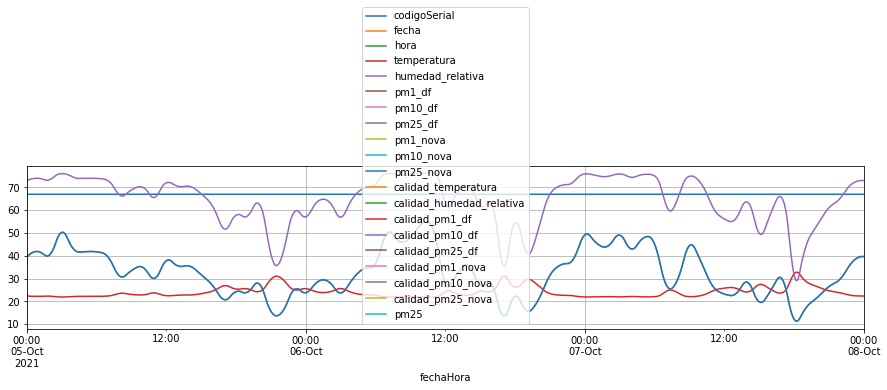

In [19]:
df_CC["pm25_nova"]=df_CC["pm25_df"]
df_CC["temperatura"]=         ta*df_CC["pm25_df"]**3  +  tb*df_CC["pm25_df"]**2  +  tc*df_CC["pm25_df"]  +  td  +  te
df_CC["humedad_relativa"]=    ha*df_CC["pm25_df"]**3  +  hb*df_CC["pm25_df"]**2  +  hc*df_CC["pm25_df"]  +  hd  +  he
#df_CC.pop("pm25")
df_CC["codigoSerial"]=67
print(df_CC.tail(5))

df_CC_aux=df_CC
df_CC_aux=df_CC_aux.set_index("fechaHora",inplace=False)
df_CC_aux.plot(figsize=(15,3))
plt.grid()
plt.show()


AND WE CREATE 10 NODES WITH THE SAME INFORMATION (RESET THE DATASET TO REMOVE THE NOISE ADDED IN BELOW CELLS

In [88]:
header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df","pm25", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
CC=pd.DataFrame(columns=header_CC)
#10 nodes with the same data.
for node in range (1,11):
    #print(node)
    df_CC["codigoSerial"]=node
    CC=CC.append(df_CC, ignore_index = True)

Add noise to the dataset

In [41]:
# ACCURACY: add an offset to the the df measurements
CC["pm25_df"]=CC["pm25_df"]*0.8
CC["pm25_nova"]=CC["pm25_nova"]*1.2

#df_CC_aux=df_CC
#df_CC_aux=df_CC_aux.set_index("fechaHora",inplace=False)
#df_CC_aux.plot(figsize=(15,3))
#plt.grid()
#plt.show()


In [74]:
# Completeness: randomly remove some data

samples2remove=random.sample(range(len(CC)), round(0.5*len(CC)))
#print(samples2remove)
for i in samples2remove:
    #print(i)
    CC.drop(i,axis='index',inplace=True)


In [89]:
# Data duplicates: randomly add some data


samples2add=random.sample(range(len(CC)), round(0.5*len(CC)))
#print(samples2remove)
for i in samples2add:
    #print(i)
    
    CC=CC.append(CC.iloc[i], ignore_index = True)

In [13]:
# Data confidence: It will depend on mainly on the: 
#p confidence level (usually set as 90, 95 and 99), Modified in the main code.
#the number of samples.

#and the stardard deviation
hourly_groups=CC.groupby([CC.fechaHora.dt.floor('60min')])#Para agrupar por cada hora
i=0
for hour in hourly_groups.groups.keys():
    
    np.random.seed(i)
    i+=1
    window=hourly_groups.get_group(hour)
    #print(window)
    mean=window.pm25_df.mean()
    #print(hour, mean)
    
    
    indexes=(CC.fechaHora>=hour.floor('60min')) & (CC.fechaHora<(hour+timedelta(minutes=1)).ceil('60min'))
    #print(indexes)
    #print(len(CC.loc[indexes,"pm25_df"]))
    CC.loc[indexes,"pm25_df"]=  CC.loc[indexes,"pm25_df"]+  np.random.normal(0, 0.1*mean, size=len(CC.loc[indexes,"pm25_df"]))
    np.random.seed(i+1)
    CC.loc[indexes,"pm25_nova"]=CC.loc[indexes,"pm25_nova"]+np.random.normal(0, 0.4*mean, size=len(CC.loc[indexes,"pm25_nova"]))

#the number of samples.
samples2remove=random.sample(range(len(CC)), round(0.4*len(CC)))
#print(samples2remove)
for i in samples2remove:
    #print(i)
    CC.drop(i,axis='index',inplace=True)

In [58]:
# PRECISION: add random values.

hourly_groups=CC.groupby([CC.fechaHora.dt.floor('60min')])#Para agrupar por cada hora
i=0
for hour in hourly_groups.groups.keys():
    
    np.random.seed(i)
    i+=1
    window=hourly_groups.get_group(hour)
    #print(window)
    mean=window.pm25_df.mean()
    #print(hour, mean)
    
    
    indexes=(CC.fechaHora>=hour.floor('60min')) & (CC.fechaHora<(hour+timedelta(minutes=1)).ceil('60min'))
    #print(indexes)
    #print(len(CC.loc[indexes,"pm25_df"]))
    CC.loc[indexes,"pm25_df"]=  CC.loc[indexes,"pm25_df"]+  np.random.normal(0, 0.2*mean, size=len(CC.loc[indexes,"pm25_df"]))
    np.random.seed(i+1)
    CC.loc[indexes,"pm25_nova"]=CC.loc[indexes,"pm25_nova"]+np.random.normal(0, 0.3*mean, size=len(CC.loc[indexes,"pm25_nova"]))
    



<Figure size 432x288 with 0 Axes>

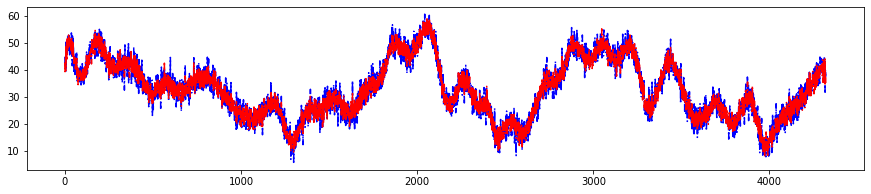

In [64]:
np.random.seed(node)
n = len(CC)
mean = 0; std = 2
np.random.normal(mean, std, size=n)



n2=len(CC.loc[CC.codigoSerial==1,"pm25_df"])
plt.figure()
plt.figure(figsize=(15,3))
plt.plot(CC.loc[CC.codigoSerial==1,"pm25_df"]+np.random.normal(mean, std, size=n2),"b-.")
#plt.figure()
#plt.figure(figsize=(15,3))
plt.plot(CC.loc[CC.codigoSerial==1,"pm25_df"],"r-.")

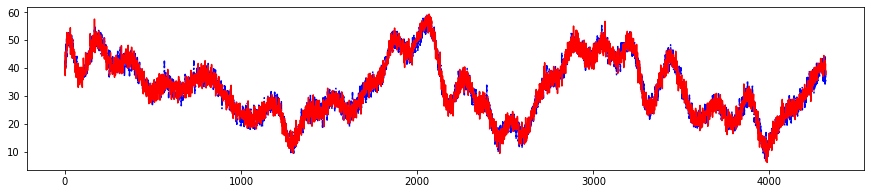

In [70]:
plt.figure(figsize=(15,3))
plt.plot(CC.loc[CC.codigoSerial==1,"pm25_df"],"b-.")

plt.plot(CC.loc[CC.codigoSerial==1,"pm25_nova"],"r-")

<AxesSubplot:ylabel='Density'>

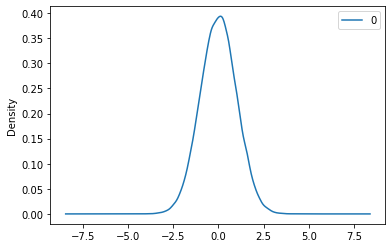

SAVE THE dataset

In [90]:
CC.pop("pm25")
CC.to_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/2 from real/"+"CC_Synthetic2_Duplicates_test5.csv",header=False,index=False)
win32api.Beep(2000, 100)

In [7]:
from scipy import stats
p=99
alpha = 1-p/100
z = stats.norm.ppf(1-alpha/2)#2-sided test
z

2.5758293035489004

Hola  Mariana
Hola  Mariana _ 1
Hola  Mariana _ 2
Hola  Mariana _ 3
Hola  Mariana _ 4
Hola  Mariana _ 5
Hola  Mariana _ 6
Hola  Mariana _ 7
Hola  Mariana _ 8
Hola  Mariana _ 9


In [19]:
list=["a","b","c"]
df_list=pd.DataFrame(list)
df_list
df_list.loc[1,]="j"
df_list


,0
0,a
1,j
2,c


In [ ]:
#0. Clean the whole dataset (the variables of interest):
import pandas as pd
import numpy as np
#Read Data from February
header_CC=["codigoSerial", "fecha", "hora", "fechaHora", "temperatura", "humedad_relativa", "pm1_df", "pm10_df", "pm25_df", "pm1_nova", "pm10_nova", "pm25_nova", "calidad_temperatura", "calidad_humedad_relativa", "calidad_pm1_df", "calidad_pm10_df", "calidad_pm25_df", "calidad_pm1_nova", "calidad_pm10_nova", "calidad_pm25_nova"]
datatypes_CC={"codigoSerial":np.uint16, "temperatura":np.float16, "humedad_relativa":np.float16, "pm1_df":np.float32, "pm10_df":np.float32, "pm25_df":np.float32, "pm1_nova":np.float32, "pm10_nova":np.float32, "pm25_nova":np.float32}
df_CC = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"CC_Synthetic2.csv", header=None, names=header_CC, usecols=header_CC , dtype=datatypes_CC,parse_dates=["fecha","hora","fechaHora"])
df_CC.sort_values(by=['codigoSerial','fechaHora'],ignore_index=True)

#Data includes January, February and March
header_SS=["Fecha_Hora","codigoSerial","pm25","calidad_pm25","pm10","calidad_pm10"]
datatypes_SS={"codigoSerial":np.uint16,"pm25":np.float32,"pm10":np.float32}
df_SS = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"SS_Synthetic_2.csv", header=None,names=header_SS, usecols=header_SS , dtype=datatypes_SS,parse_dates=["Fecha_Hora"], 
            dayfirst=True)
df_SS.sort_values(by=['codigoSerial','Fecha_Hora'],ignore_index=True)

def clean_sort_data(df_CC, df_SS):
    
    #ClEAN AND SORT THE CITIZEN SCIENCE DATASET
    #Remove outliers that are out of range, from documentation both nova and df range of measurements are [0,999], [-40,70], [1,100]
    #For PM2.5, Temperature and Relative Humidity Respectively.
    df_CC=df_CC.copy()
    df_CC.loc[df_CC["pm25_nova"]>999,"pm25_nova"]=np.nan
    df_CC.loc[df_CC["pm25_nova"]<0,"pm25_nova"]=np.nan
    df_CC.loc[df_CC["pm25_df"]>999,"pm25_df"]=np.nan
    df_CC.loc[df_CC["pm25_df"]<0,"pm25_df"]=np.nan
    df_CC.loc[df_CC["temperatura"]>70,"temperatura"]=np.nan
    df_CC.loc[df_CC["temperatura"]<-40,"temperatura"]=np.nan
    df_CC.loc[df_CC["humedad_relativa"]>100,"humedad_relativa"]=np.nan
    df_CC.loc[df_CC["humedad_relativa"]<1,"humedad_relativa"]=np.nan

    
    #Remove data above the whiskers of the boxplot: i.e. anomaly data
    Q1 = df_CC['pm25_df'].quantile(0.25)
    Q3 = df_CC['pm25_df'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_CC.loc[df_CC["pm25_df"]>=Q3 + 1.5 *IQR,"pm25_df"]=np.nan
    
    Q1 = df_CC['pm25_nova'].quantile(0.25)
    Q3 = df_CC['pm25_nova'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_CC.loc[df_CC["pm25_nova"]>=Q3 + 1.5 *IQR,"pm25_nova"]=np.nan
    
    Q1 = df_CC['temperatura'].quantile(0.25)
    Q3 = df_CC['temperatura'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_CC.loc[df_CC["temperatura"]>=Q3 + 1.5 *IQR,"temperatura"]=np.nan
    
    Q1 = df_CC['humedad_relativa'].quantile(0.25)
    Q3 = df_CC['humedad_relativa'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_CC.loc[df_CC["humedad_relativa"]>=Q3 + 1.5 *IQR,"humedad_relativa"]=np.nan
    
    #CREATE A DICTINARY CONTAINING THE DATASETS PER NODE
    grouped=df_CC.groupby(df_CC.codigoSerial)
    CC={}
    print("Citizen Scientist: ", sorted(list(df_CC.codigoSerial.unique())))
    for i in df_CC.codigoSerial.unique():
        CC[i] = grouped.get_group(i).sort_values(by=['fechaHora'],ignore_index=True)
    
    #ClEAN AND SORT THE SIATA STATIONS DATASET
    #Remove outliers that are out of range, from documentation both nova and df range of measurements are [0,999]
    df_SS=df_SS.copy()
    df_SS.loc[df_SS["pm25"]>999,"pm25"]=np.nan
    df_SS.loc[df_SS["pm25"]<0,"pm25"]=np.nan

    
    #Remove data above the whiskers of the boxplot: i.e. anomaly data
    Q1 = df_SS['pm25'].quantile(0.25)
    Q3 = df_SS['pm25'].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    df_SS.loc[df_SS["pm25"]>=Q3 + 1.5 *IQR,"pm25"]=np.nan
    
    #CREATE A DICTINARY CONTAINING THE DATASETS PER SIATA STATION
    grouped=df_SS.groupby(df_SS.codigoSerial)
    SS={}
    print("Siata Stations: ", list(df_SS.codigoSerial.unique()))
    for j in df_SS.codigoSerial.unique():
        SS[j] = grouped.get_group(j).sort_values(by=['Fecha_Hora'],ignore_index=True)
    
    del grouped
    return CC, SS
CC, SS=clean_sort_data(df_CC, df_SS)
del df_CC
del df_SS

datatypesDistances={"codigoSerial_CC":np.uint16,"codigoSerial_ES":np.uint16,"Distancia_a_ES":np.float16,"codigoSerial_ES2":np.uint16}
Distances = pd.read_csv("C:/Users/julio/Documents/UDEA/Maestría/DQ in IOT/Datasets/Dataset for testing/Synthetic/"+"Distancias_Synthetic_2.csv", header=0, dtype=datatypesDistances,index_col="codigoSerial_CC")

#arguments=[nodes=10, CC=CC, SS=CC, Distances=Distances, start_time=start_time, end_time=end_time]
from datetime import datetime, timedelta


#Precision
def precision(window):

    prec_df=1-(window['pm25_df'].std()/window['pm25_df'].mean())# 1-Coefficient of Variation (std/mean)
    prec_nova=1-(window['pm25_nova'].std()/window['pm25_nova'].mean())# 1-Coefficient of Variation (std/mean)
    prec_dict_time={"precision_df_time":prec_df,"precision_nova_time":prec_nova}
    return prec_dict_time


#Uncertainty
def uncertainty(window):
    uncert=1-np.sqrt((window.pm25_df-window.pm25_nova).pow(2).mean()/2)/((window.pm25_df+window.pm25_nova).mean()/2)
    uncer_dict_time={"uncertainty_time":uncert}
    return uncer_dict_time   


#ACCURACY
def accuracy(node,hour, window, Distances, SS):
    
    pm25_df_ave=window['pm25_df'].mean()
    pm25_nova_ave=window['pm25_nova'].mean()
    #print(pm25_df_ave, pm25_nova_ave)
    Closest_Station=Distances.codigoSerial_ES.loc[node]    
    Closest_Station2=Distances.codigoSerial_ES.loc[node] 
    #print(pm25_df_ave,pm25_nova_ave,Closest_Station,Closest_Station2)
    #print(Closest_Station in SS.keys())
    #print(hour in SS[Closest_Station].Fecha_Hora.values, hour)
   # print(SS[Closest_Station].Fecha_Hora)
    
    if (Closest_Station in SS.keys()) and (hour in SS[Closest_Station].Fecha_Hora.values):
        
        #print(SS[Closest_Station])
        #df_window.loc[df_window["fechaHora"]==ts,'pm25_nova_ave']
        v=SS[Closest_Station].loc[SS[Closest_Station].Fecha_Hora==hour,"pm25"].values[0]
        #print()
        #print(pm25_df_ave)
        accur_df=  max(0,1-abs(pm25_df_ave-v)/v)
        accur_nova= max(0,1-abs(pm25_nova_ave-v)/v)
    
    elif (Closest_Station2 in SS.keys()) and  (hour in SS[Closest_Station2].Fecha_Hora.values):
        
        v=SS[Closest_Station2].loc[SS[Closest_Station2].Fecha_Hora==hour,"pm25"].values[0]
        #v=SS[Closest_Station2].loc[hour,"pm25"]
        accur_df=  max(0,1-abs(pm25_df_ave-v)/v)
        accur_nova= max(0,1-abs(pm25_nova_ave-v)/v)
    else:
        accur_df=np.nan
        accur_nova=np.nan
    accu_dict_time={'accuracy_df_time':accur_df, 'accuracy_nova_time':accur_nova}
    return accu_dict_time


#CONCORDANCE
def concordance(node, hour, window, Distances, SS):
    Closest_Station=Distances.codigoSerial_ES.loc[node]
    Closest_Station2=Distances.codigoSerial_ES.loc[node]
    window=window.copy()
    #window.loc[:,'v_pm25']=np.nan
    if (Closest_Station in SS.keys()) and (hour in SS[Closest_Station].Fecha_Hora.values):
        
        #window.loc[window[,"v_pm25"]=np.nan
        
        #v=SS[Closest_Station].loc[SS[Closest_Station].Fecha_Hora==hour,"pm25"].values[0]
        #window.loc[:,'v_pm25']=v
        
        v=SS[Closest_Station].loc[SS[Closest_Station].Fecha_Hora==hour,"pm25"].values[0]
        window.loc[:,"v_pm25"]=v
        
        corr_df =   window.loc[:,["pm25_df","pm25_nova","v_pm25","temperatura","humedad_relativa"]].corr().iloc[0].abs()
        corr_nova = window.loc[:,["pm25_df","pm25_nova","v_pm25","temperatura","humedad_relativa"]].corr().iloc[1].abs()
        concordance_df_nova=corr_df.pm25_nova
        concordance_df_siata=corr_df.v_pm25
        concordance_df_hum=corr_df.humedad_relativa
        concordance_df_temp=corr_df.temperatura
        concordance_nova_siata=corr_nova.v_pm25
        concordance_nova_hum=corr_nova.humedad_relativa
        concordance_nova_temp=corr_nova.temperatura
   
            
    elif (Closest_Station2 in SS.keys()) and (hour in SS[Closest_Station2].Fecha_Hora.values):
        
        v=SS[Closest_Station2].loc[SS[Closest_Station2].Fecha_Hora==hour,"pm25"].values[0]
        window.loc[:,"v_pm25"]=v
        
        corr_df =   window.loc[:,["pm25_df","pm25_nova","v_pm25","temperatura","humedad_relativa"]].corr().iloc[0].abs()
        corr_nova = window.loc[:,["pm25_df","pm25_nova","v_pm25","temperatura","humedad_relativa"]].corr().iloc[1].abs()
        concordance_df_nova=corr_df.pm25_nova
        concordance_df_siata=corr_df.v_pm25
        concordance_df_hum=corr_df.humedad_relativa
        concordance_df_temp=corr_df.temperatura
        concordance_nova_siata=corr_nova.v_pm25
        concordance_nova_hum=corr_nova.humedad_relativa
        concordance_nova_temp=corr_nova.temperatura
    else:
        concordance_df_nova=np.nan
        concordance_df_siata=np.nan
        concordance_df_hum=np.nan
        concordance_df_temp=np.nan
        concordance_nova_siata=np.nan
        concordance_nova_hum=np.nan
        concordance_nova_temp=np.nan
       
    conco_dict={"concordance_df_nova_time":concordance_df_nova,
                "concordance_df_siata":concordance_df_siata,
                "concordance_df_hum_time":concordance_df_hum,
                "concordance_df_temp_time":concordance_df_temp,
                "concordance_nova_siata":concordance_nova_siata,
                "concordance_nova_hum_time":concordance_nova_hum,
                "concordance_nova_temp_time":concordance_nova_temp}
    return conco_dict


#COMPLETENESS
def completeness(node, window,start_time, end_time):
    
    if window.fechaHora.min()==start_time and window.fechaHora.max()==end_time:
        ref_date_range = pd.DataFrame(pd.date_range(start_time,end_time, freq='1Min'),columns=["ref_fechaHora"])
    
    elif window.fechaHora.min()==start_time:
        ref_date_range = pd.DataFrame(pd.date_range(start_time, pd.Timestamp(start_time).ceil('60min')-timedelta(minutes=1), freq='1Min'),columns=["ref_fechaHora"])
        
    elif window.fechaHora.max()==end_time:
        ref_date_range = pd.DataFrame(pd.date_range(pd.Timestamp(end_time).floor('60min')-timedelta(minutes=1),pd.Timestamp(end_time), freq='1Min'),columns=["ref_fechaHora"])
    
    else:
        ref_date_range = pd.DataFrame(pd.date_range(window.fechaHora.min().floor('60min'),window.fechaHora.min().floor('60min')+timedelta(minutes=59), freq='1Min'),columns=["ref_fechaHora"])
        
    #Check for any missing date
    missing_dates = ref_date_range.loc[~ref_date_range.ref_fechaHora.isin(window.fechaHora),"ref_fechaHora"]
    
    #Add missing date rows
    for missing in missing_dates:
        window=window.append({"codigoSerial":node,"fechaHora":missing}, ignore_index = True)
    #Check for missing data
    missing_data_df=np.count_nonzero(np.isnan(window['pm25_df']))
    missing_data_nova=np.count_nonzero(np.isnan(window['pm25_nova']))
    comp_df=(1-missing_data_df/np.size(window.pm25_df))
    comp_nova=(1-missing_data_nova/np.size(window.pm25_nova))
    comp_dict_time={'completeness_df_time':comp_df, 'completeness_nova_time':comp_nova}        
    return comp_dict_time



def eval_dq(arguments):
    nodes=arguments[0]
    CC=arguments[1]
    SS=arguments[2]
    Distances=arguments[3]
    start_time=arguments[4]
    end_time=arguments[5]
    
    #1. For each citizen science (CC) node, get the groups (HOURLY GROUPS).
    #node_dataset=CC[nodes]
    node_dataset=CC[nodes][(CC[nodes]['fechaHora'] >= start_time) & (CC[nodes]['fechaHora'] <= end_time)]
    #print(node_dataset)
    #times = pd.to_datetime(node_dataset.fechaHora)
    hourly_groups=node_dataset.groupby([node_dataset.fechaHora.dt.floor('60min')])#Para agrupar por cada hora
    hourly_groups.groups.keys()# O grupos.groups para obtener las claves de cada grupo, es decir cada hora
    del node_dataset
    

    dim_time = pd.DataFrame(
        columns =["codigoSerial",
                  "fechaHora",
                  "precision_df_time",
                  "precision_nova_time",
                  "uncertainty_time",
                  "accuracy_df_time",
                  "accuracy_nova_time",
                  "completeness_df_time",
                  "completeness_nova_time",
                  
                  "concordance_df_nova_time",
                  
                  "concordance_df_siata",#MAYBE NEED TO BE CALCULATED ON A DAILY BASIS
                  "concordance_df_hum_time",
                  "concordance_df_temp_time",
                  
                  "concordance_nova_siata",#MAYBE NEED TO BE CALCULATED ON A DAILY BASIS
                  "concordance_nova_hum_time",
                  "concordance_nova_temp_time"])
    
    #2. For each group (hour in a CC node data), calculate the Dimension's DQ. (The functions should be applied to each group instead)
    for hour in hourly_groups.groups.keys():
        window=hourly_groups.get_group(hour)
        #window['v_pm25']=np.nan
        
        preci_dict_time=precision(window)
        uncer_dict_time=uncertainty(window)
        accur_dict_time=accuracy(nodes, hour, window, Distances, SS)
        conco_dict_time=concordance(nodes, hour, window, Distances, SS)
        comp_dict_time=completeness(nodes, window,start_time, end_time)
        
        DQ_dict_time={"codigoSerial":nodes,"fechaHora":hour}
        DQ_dict_time.update(preci_dict_time)
        DQ_dict_time.update(uncer_dict_time)
        DQ_dict_time.update(accur_dict_time)
        DQ_dict_time.update(conco_dict_time)
        DQ_dict_time.update(comp_dict_time)
        
        
        #3. Save the result file in the form: Node, Group (hour), DQ_1, DQ_2, DQ3, ... , DQIndex  (This is new)
        dim_time=dim_time.append(DQ_dict_time, ignore_index = True)
    
    return dim_time


In [ ]:
start_time ="2021-10-05 00:00:00"
end_time   ="2021-10-07 23:59:00"
OUTPUT=eval_dq([2,CC,SS,Distances,start_time,end_time])
OUTPUT